In [5]:
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_validate

import matplotlib.pyplot as plt


In [6]:
cancer = load_breast_cancer()

# 3. k-folds Cross Validation

Рассмотрим, как на показатель правильности влияет количество блоков, на которые разбиваются тренировочные данные при кросс валидации.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)

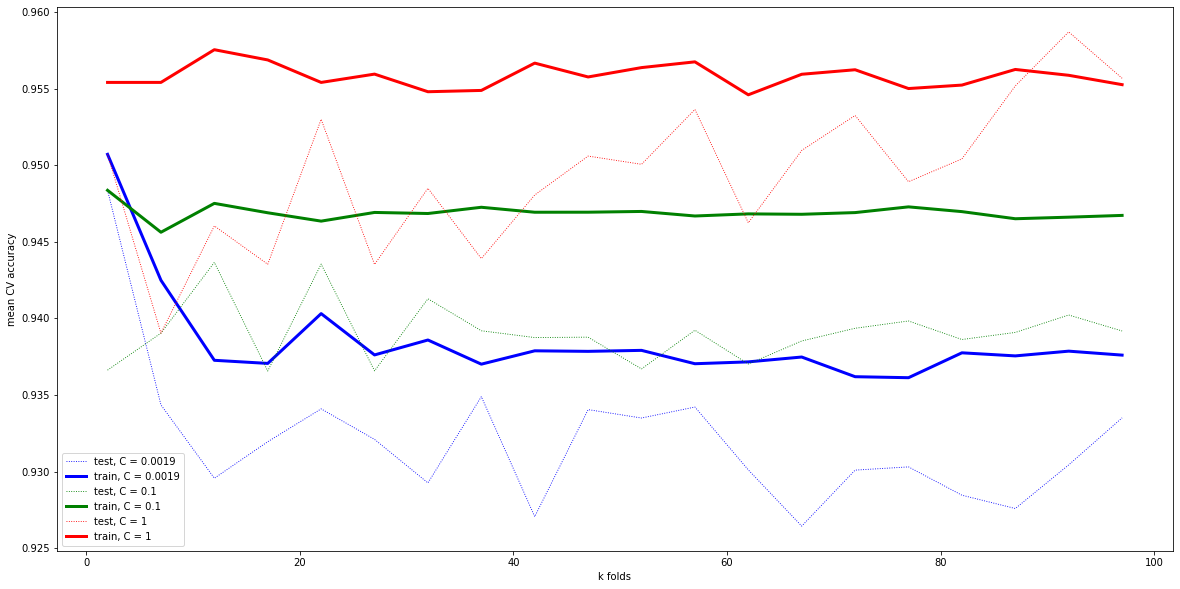

In [32]:
folds = np.arange(2,102,5)
rcParams['figure.figsize'] = 20, 10
for c,col in zip([0.0019, 0.1,1],['b','g','r']):
    mean_test_score_cv = []
    mean_train_score_cv = []

    for k in folds:
        kf = KFold(n_splits=k)
        log_reg = LogisticRegression(C = c)
        log_reg_CV = cross_validate(log_reg, X_train, y_train, cv = kf, return_train_score = True)
        test_score_cv = list(log_reg_CV.items())[2][1]
        train_score_cv = list(log_reg_CV.items())[3][1]
        mean_test_score_cv.append(np.mean(test_score_cv))
        mean_train_score_cv.append(np.mean(train_score_cv))
    
        
    plt.plot(folds, mean_test_score_cv, label = 'test, C = {}'.format(c),linestyle='dotted', c = col,linewidth = 0.9)
    plt.plot(folds, mean_train_score_cv, label = 'train, C = {}'.format(c), c = col, linewidth = 3)
    plt.legend(loc = 'best')
plt.xlabel('k folds')
plt.ylabel('mean CV accuracy')
plt.show()

## 3.1. LeaveOneOut CV

Для осуществления перекрестной проверки с исключением по одному в sklearn есть специальный метод.

In [9]:
X_train.shape # k = 426

(426, 30)

In [11]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
log_reg = LogisticRegression(C = 1)
cv_model = cross_validate(log_reg, X_train,y_train, cv=loo,return_train_score = True)
mean_train = np.mean(list(cv_model.items())[2][1])
mean_test = np.mean(list(cv_model.items())[3][1])

print("Средняя правильность test set: {:.3f}".format(mean_test))
print("Средняя правильность train set: {:.3f}".format(mean_train))     

Средняя правильность test set: 0.956
Средняя правильность train set: 0.951
